In [1]:
import glob
import random
import cv2
import matplotlib.pyplot as plt

In [2]:
paths = sorted(glob.glob('data/*.jpg'))

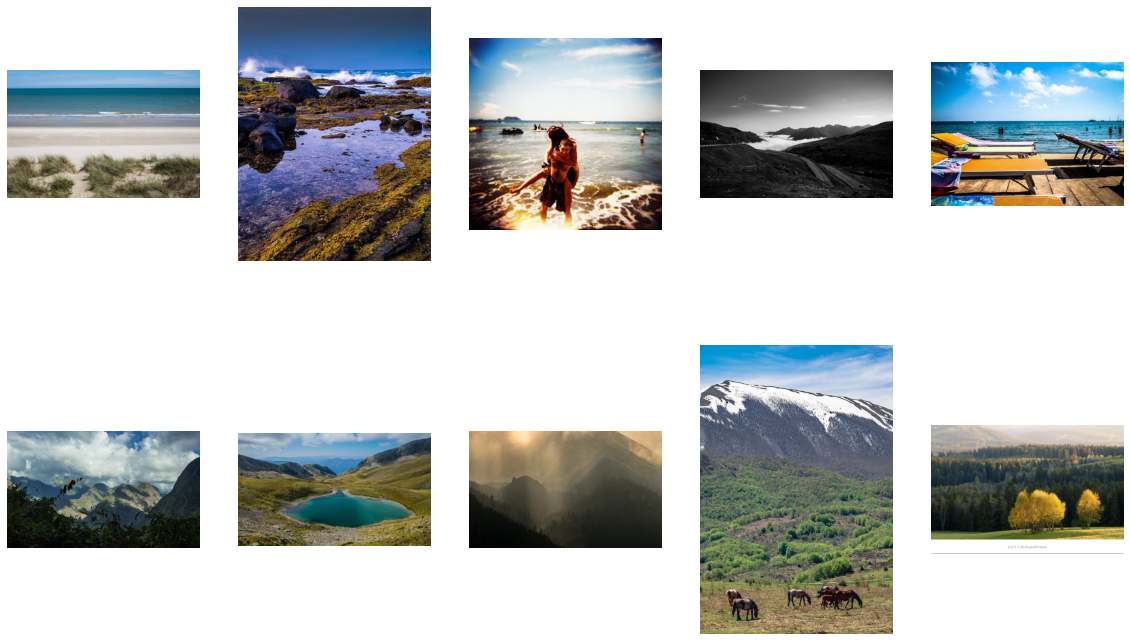

In [5]:
random.seed(3)

randImg = random.choices(paths, k=10)
images = []

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,12))
for ax, path in zip(axes.flatten(), randImg):
    im = plt.imread(path)
#     im = transform.resize(im, (224, 224))
    images.append(im)
    ax.imshow(im)
    ax.axis('off')

In [8]:
def plot(images):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
    for ax, im in zip(axes.flatten(), images):
        ax.imshow(im)
        ax.axis('off')

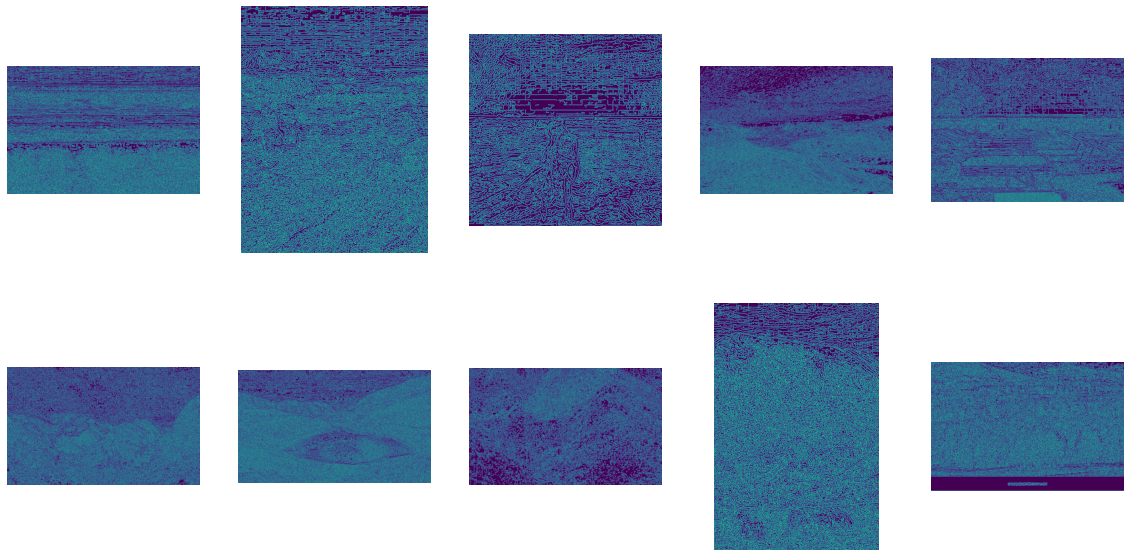

In [9]:
edges = [cv2.Canny(im, 50, 100, apertureSize=5) for im in images]
plot(edges)

In [11]:
index = -1

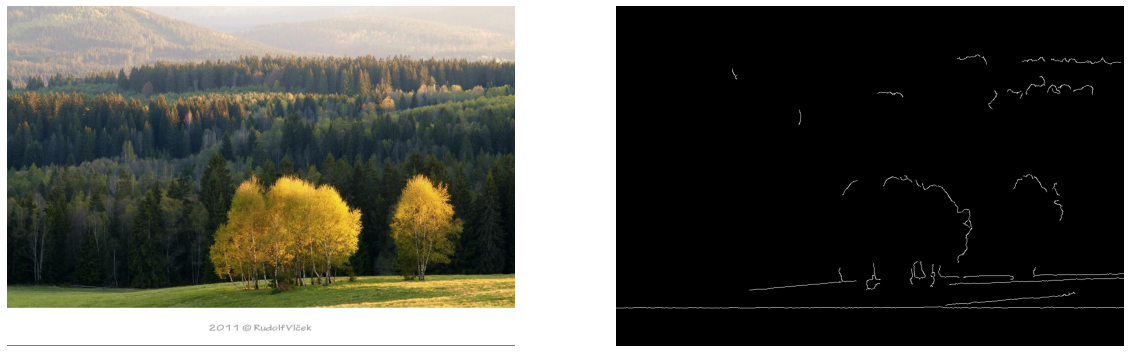

In [21]:
lowThres = 16
highThres = 150
apertureSize = 0
gaussianSize = 6

index = 0
# index += 1
im_raw = images[index][...,::-1].copy()
im = cv2.cvtColor(im_raw, cv2.COLOR_RGB2GRAY);
newIm = None

def modifyImg():
    global lowThres, highThres, apertureSize, gaussianSize, newIm
    if gaussianSize:
        newIm = cv2.GaussianBlur(im, (2*gaussianSize+1, 2*gaussianSize+1), 0)
    else:
        newIm = im.copy()
    newIm = cv2.Canny(newIm, lowThres, highThres, apertureSize=apertureSize*2+3)
    cv2.imshow(window_name, newIm)

# callback function
def _lowThres(*args):
    global lowThres
    lowThres = args[0]
    modifyImg()

def _highThres(*args):
    global highThres
    highThres = args[0]
    modifyImg()

def _aperatureSize(*args):
    global apertureSize
    apertureSize = args[0]
    modifyImg()

def _gaussianBlur(*args):
    global gaussianSize
    gaussianSize = args[0]
    modifyImg()
    
    
window_name = "Find Edges"
cv2.namedWindow(window_name, cv2.WINDOW_AUTOSIZE)
cv2.createTrackbar("Low Threshold", window_name, lowThres, 255, _lowThres)
cv2.createTrackbar("High Threshold", window_name, highThres, 255, _highThres)
cv2.createTrackbar("Aperture Size", window_name, apertureSize, 2, _aperatureSize)
cv2.createTrackbar("Gaussian Size", window_name, gaussianSize, 9, _gaussianBlur)

modifyImg()
cv2.waitKey(0)

cv2.destroyAllWindows()
cv2.waitKey(1) # for mac only

# save edge image
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].imshow(images[index]);axes[0].axis('off')
axes[1].imshow(newIm, cmap='gray');axes[1].axis('off')
fig.savefig(f"edges/{randImg[index].split('/')[-1]}", bbox_inches='tight')